# TITANIC: Kaggle competition

**TAREA: CLASIFICACIÓN**<br>
**NIVEL: INTERMEDIATE**

Vamos a participar en la competicion de **Kaggle del Titanic**: https://www.kaggle.com/competitions/titanic <br> Para ello atacaremos 3 puntos clave para obtener el mejor modelo posible:
* ML Preprocessing
* Competicion de modelos
* Hiperparametros
<br><br>
A diferencia de en el flujo ML convencional, en las competiciones de Kaggle no haremos la evaluación del TEST en el notebook, sino que tendremos que subir un predict del test a la plataforma de submissions y la plataforma lo evaluará.
<br><br>
...A POR ELLO!

# Librerias

In [ ]:
import pandas as pd     # Manejo de dataframes
import numpy as np      # Calculos matriciales
import matplotlib.pyplot as plt    # Visualizacion
import seaborn as sns              # Visualizacion
from google.colab import drive     # Drive en Colab

pd.set_option('display.max_columns', None)   # para visualizar mas columnas en un df

import warnings
warnings.filterwarnings("ignore")  # inhabilita warnings

# Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/train.csv')

In [ ]:
print(df.shape)

(891, 12)


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Longitud nombre
df['Name'].str.len()

0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name, Length: 891, dtype: int64

In [ ]:
# Primera letra cabina
df['Cabin'].str[0]

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [ ]:
# Numero de palabras
df["Name"].apply(lambda n: len(n.split()))

0      4
1      7
2      3
3      7
4      4
      ..
886    3
887    4
888    5
889    4
890    3
Name: Name, Length: 891, dtype: int64

# ML Preprocessing

## EDA

Analisis de las distribuciones de las variables.

In [ ]:
target = 'Survived'
features = df.columns[df.columns!=target]

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Data cleaning

El step del data cleaning es el cajón de sastre donde corregiremos las particularidades del dataset más allá del ML preprocessing estandar. Por ejemplo:
* Eliminar registros duplicados
* Eliminar filas sin target informado
* Eliminar columnas irrelevantes
* Corregir erratas en literales
* Corregir data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Survived'].isna().sum()

0

In [ ]:
del df['Ticket']

In [ ]:
df.set_index('PassengerId', inplace=True)

In [ ]:
len(df.index)

891

In [ ]:
df['Cabin'] = df['Cabin'].str[0]

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [ ]:
df['Name_Length'] = df['Name'].str.len()
print(df)

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
...       

In [ ]:
del df['Name']

In [ ]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Name_Length
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S,23
2,1,1,female,38.0,1,0,71.2833,C,C,51
3,1,3,female,26.0,0,0,7.9250,NaN,S,22
4,1,1,female,35.0,1,0,53.1000,C,S,44
5,0,3,male,35.0,0,0,8.0500,NaN,S,24


## Imputar valores en nulos

Algunas de las estrategias mas comunes:
* Imputar valor outlier (-999, 'Unknown')
* Imputar media en numericos
* Imputar moda en categoricos
* Imputar 0

In [ ]:
df.isna().sum()

Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
Name_Length      0
dtype: int64

In [ ]:
df['Age'] = df['Age'].fillna(-999)

In [ ]:
df['Cabin'] = df['Cabin'].fillna('Desconocido')

In [ ]:
df['Embarked'] = df['Embarked'].fillna('Desconocido')

In [ ]:
df.isna().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Name_Length    0
dtype: int64

In [ ]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Name_Length
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,Desconocido,S,23
2,1,1,female,38.0,1,0,71.2833,C,C,51
3,1,3,female,26.0,0,0,7.9250,Desconocido,S,22
4,1,1,female,35.0,1,0,53.1000,C,S,44
5,0,3,male,35.0,0,0,8.0500,Desconocido,S,24


In [ ]:
df2=df.copy()

## Encoding categoricos

3 opciones:
* Si tienen un sentido ordinal -> convertir a numerico.
* Si tienen un sentido cardinal:
  * 2 posibles categorias -> indicador booleano
  * más de 2 categorias -> One-Hot-Encoding

In [ ]:
categories = list(df.select_dtypes(include='object').columns)
print('Variables categoricas a encodear:', categories)

Variables categoricas a encodear: ['Sex', 'Cabin', 'Embarked']


In [ ]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=categories)

In [ ]:
categories = list(df.select_dtypes(include='object').columns)
print('Total categoricas:', len(categories))

Total categoricas: 0


In [ ]:
df.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Name_Length,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_Desconocido,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Desconocido,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,23,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
2,1,1,38.0,1,0,71.2833,51,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,1,3,26.0,0,0,7.9250,22,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


## Eliminar alta correlación

In [ ]:
target = 'Survived'
features = df.columns[df.columns!=target]

# Divide dataset en matriz de variables (X) y output (y)
X = df[features]
y = df[target]

In [ ]:
# Mismo analisis, pero desde una funcion que nos facilita la vida
def highly_correlated(X, y, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = X.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]

    return Z

highly_corr = highly_correlated(X,y,0.95)
highly_corr

,F1,F2,corr_F1_F2,corr_F1_target,corr_F2_target,F_to_delete
0,Sex_male,Sex_female,1.0,0.543351,0.543351,Sex_female


In [ ]:
# Eliminamos las features altamente correlacionadas
drop_cols = list(highly_corr['F_to_delete'])
X.drop(columns=drop_cols, inplace=True)
print('Eliminadas columnas altamente correlacionadas:', drop_cols)

Eliminadas columnas altamente correlacionadas: ['Sex_female']


In [ ]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Name_Length,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_Desconocido,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Desconocido,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,23,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
2,1,1,38.0,1,0,71.2833,51,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,1,3,26.0,0,0,7.9250,22,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,1,1,35.0,1,0,53.1000,44,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5,0,3,35.0,0,0,8.0500,24,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1


## Eliminar mínima varianza

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
# Eliminamos columnas practicamente constantes (nula varianza)
vt = VarianceThreshold(threshold = 0.01)
vt.fit(X)

cols_lowvar = X.columns[vt.get_support()==False]
X.drop(columns=cols_lowvar,inplace=True)

print(len(cols_lowvar),' low variance features were removed:\n', cols_lowvar.to_list())

3  low variance features were removed:
 ['Cabin_G', 'Cabin_T', 'Embarked_Desconocido']


# Split X-y

In [ ]:
target = 'Survived'
features = df.columns[df.columns != target]

In [ ]:
y = df[target]
X = df[features]

In [ ]:
print('Target del modelo:', target)
print('Variables a utilizar en el modelo:', list(features))

Target del modelo: Survived
Variables a utilizar en el modelo: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_Length', 'Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_Desconocido', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Embarked_C', 'Embarked_Desconocido', 'Embarked_Q', 'Embarked_S']


# Target distribution

[]

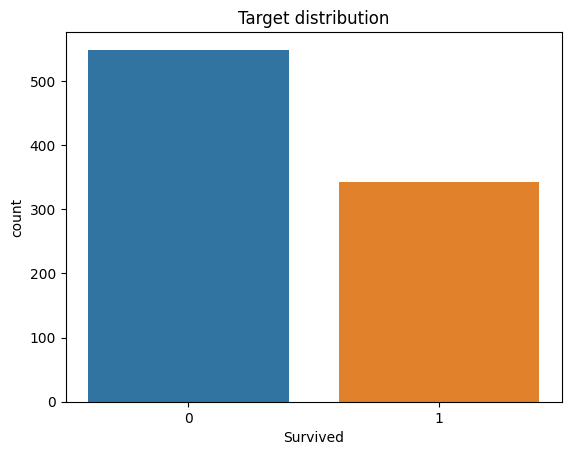

In [ ]:
sns.countplot(x=df[target])
plt.title('Target distribution')
plt.plot()

# Split train-test (NO)

Como estamos en una competicion no sacrificaremos parte del dataset para TEST, haremos Cross-Validation para seleccionar el mejor modelo.

In [ ]:
X_train = X
y_train = y

# Rescaling

Definimos el scaler en el train (.fit_transform).

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Estandarización: fit_transform() en train, transform() en test
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_train_std = pd.DataFrame(X_train_std, columns = X_train.columns, index= X_train.index)

In [ ]:
X_train_std.head()

,Pclass,Age,SibSp,Parch,Fare,Name_Length,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_Desconocido,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Desconocido,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0.827377,0.478896,0.432793,-0.473674,-0.502445,-0.427451,-0.737695,0.737695,-0.130856,-0.235981,-0.266296,-0.196116,0.544925,-0.193009,-0.121681,-0.067153,-0.03352,-0.482043,-0.047431,-0.307562,0.619306
2,-1.566107,0.517860,0.432793,-0.473674,0.786845,2.590962,1.355574,-1.355574,-0.130856,-0.235981,3.755222,-0.196116,-1.835115,-0.193009,-0.121681,-0.067153,-0.03352,2.074505,-0.047431,-0.307562,-1.614710
3,0.827377,0.488637,-0.474545,-0.473674,-0.488854,-0.535252,1.355574,-1.355574,-0.130856,-0.235981,-0.266296,-0.196116,0.544925,-0.193009,-0.121681,-0.067153,-0.03352,-0.482043,-0.047431,-0.307562,0.619306
4,-1.566107,0.510554,0.432793,-0.473674,0.420730,1.836359,1.355574,-1.355574,-0.130856,-0.235981,3.755222,-0.196116,-1.835115,-0.193009,-0.121681,-0.067153,-0.03352,-0.482043,-0.047431,-0.307562,0.619306
5,0.827377,0.510554,-0.474545,-0.473674,-0.486337,-0.319651,-0.737695,0.737695,-0.130856,-0.235981,-0.266296,-0.196116,0.544925,-0.193009,-0.121681,-0.067153,-0.03352,-0.482043,-0.047431,-0.307562,0.619306


# TRAIN MODEL

## Model competition

* Prueba distintos modelos de https://scikit-learn.org/stable/modules/classes.html
y mide su performance con Cross Validation.
* Para ello utiliza la funcion evaluate_classification() para registrar los resultados del benchmark de modelos.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [ ]:
# Funcion que calcula el AUC de un modelo sobre un dataset (X-y). Args: modelo a validar, X, y
def auc(model,X,y):
  model.fit(X,y)
  return roc_auc_score(y,model.predict_proba(X)[:,1])

# Funcion que calcula el AUC en Cross-Validation (X-y). Args: modelo a validar, X, y
def auc_cross_validation(model,X,y):
  cross_val = cross_val_score(model,
                              X, y,
                              cv=4,                 # Numero de folds que vamos a utilizar para validar
                              scoring='roc_auc'     # La metrica de validacion que se medira en cada train-valida
                              )
  return cross_val.mean()

In [ ]:
# Inicializa resultados
label_, auc_train_ , auc_valida_ = [], [], []

# Completa un registro en dataframe con los resultados de las funciones definidas previsamente ( AUC y AUC con cross-validation)

# Inputs:
#   * modelo
#   * (X,y)
#   * label especifico si queremos registrar el resultado con otro nombre (opcional)


def evaluate_classification(model, X, y, label=None):
  if label is None:
    label=str(model)
  label_.append(label)

  auc_train = auc(model,X,y)
  auc_valida = auc_cross_validation(model,X,y)
  auc_train_.append(auc_train)
  auc_valida_.append(auc_valida)

  return pd.DataFrame({'Model': label_,
                      'AUC Train': auc_train_,
                      'AUC Cross-Valida': auc_valida_
                      }).sort_values('AUC Cross-Valida',ascending=False)

Algunos modelos a probar:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
?LGBMClassifier

In [ ]:
evaluate_classification(model = LogisticRegression(),
                    X=X_train_std, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,LogisticRegression(),0.8553,0.839963


In [ ]:
evaluate_classification(model = RandomForestClassifier(),
                    X=X_train_std, y=y_train)

,Model,AUC Train,AUC Cross-Valida
1,RandomForestClassifier(),0.999976,0.855559
0,LogisticRegression(),0.855300,0.839963


In [ ]:
evaluate_classification(model = XGBClassifier(),
                    X=X_train_std, y=y_train)

,Model,AUC Train,AUC Cross-Valida
1,RandomForestClassifier(),0.999976,0.855559
2,"XGBClassifier(base_score=None, booster=None, c...",0.999688,0.852164
0,LogisticRegression(),0.855300,0.839963


In [ ]:
evaluate_classification(model = LGBMClassifier(),
                    X=X_train_std, y=y_train)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 295
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Info] Number of positive: 257, number of negative: 411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 268
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 16
[LightGBM] [Info] [binary:BoostF

,Model,AUC Train,AUC Cross-Valida
3,LGBMClassifier(),0.998948,0.866420
1,RandomForestClassifier(),0.999976,0.855559
2,"XGBClassifier(base_score=None, booster=None, c...",0.999688,0.852164
0,LogisticRegression(),0.855300,0.839963


In [ ]:
evaluate_classification(model = KNeighborsClassifier(),
                    X=X_train_std, y=y_train)

,Model,AUC Train,AUC Cross-Valida
3,LGBMClassifier(),0.998948,0.866420
1,RandomForestClassifier(),0.999976,0.855559
2,"XGBClassifier(base_score=None, booster=None, c...",0.999688,0.852164
0,LogisticRegression(),0.855300,0.839963
4,KNeighborsClassifier(),0.917199,0.825126


## Hyperparameter tuning

La hiperparametrización puede ser costosa sino acotamos lo suficiente el abanico de posibles valores. Como consejo, centrarse en hiperparametrizar los primeros valores que aparecen dentro de la funcion del algoritmo, suelen ser los más determinantes, y no dejar de consultar la documentacion para entender que posibles valores adopta cada parametro.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameters_hp = {
    'n_estimators': [10, 30, 50, 70, 100],
    'max_depth' : [2, 3, 4, 5, 6, 7],
    'bootstrap' : [False, True],
    'min_samples_split' : [1, 2, 3, 4]
}

In [ ]:
search_hp = RandomizedSearchCV(estimator=LGBMClassifier(),
                               param_distributions = parameters_hp,
                               scoring='roc_auc',     # metrica a optimizar: RMSE
                               cv = 4,                                    # numero de folds para cross-validation
                               n_iter = 100,                               # numero de iteraciones, cada una testeara una configuracion distinta
                               n_jobs=-1,
                               verbose=True)

In [ ]:
search_hp.fit(X_train_std, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 295
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

RandomizedSearchCV(cv=4, estimator=LGBMClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [False, True],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   scoring='roc_auc', verbose=True)

In [ ]:
print("---- Results from Random Search -----" )
print("\n The best estimator across ALL searched params:", search_hp.best_estimator_)
print("\n The best RMSE:", -search_hp.best_score_)
print("\n The best parameters across ALL searched params:\n", search_hp.best_params_)

---- Results from Random Search -----

 The best estimator across ALL searched params: LGBMClassifier(bootstrap=True, max_depth=4, min_samples_split=4)

 The best RMSE: -0.8673642607685543

 The best parameters across ALL searched params:
 {'n_estimators': 100, 'min_samples_split': 4, 'max_depth': 4, 'bootstrap': True}


## Final model

Como hemos aplicado hiperparametrizacion, el modelo sera el resultado del proceso (si conseguimos mejorar a la parametrización por default).



In [ ]:
best_model = search_hp.best_estimator_

# PREDICT FOR SUBMISSION

Para hacer el submit de los datos en la competicion, tenemos que hacer un predict sobre el dataset 'titanic_test.csv'.

In [ ]:
X_pred = pd.read_csv('/content/drive/MyDrive/Machine Learning/test.csv')
print(X_pred)
X_pred.head()

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Model features

In [ ]:
features_model =  list(best_model.feature_name_)
print('Estas son las variables que tenemos que conseguir en el preprocessing para que el modelo funcione:\n', features_model)

Estas son las variables que tenemos que conseguir en el preprocessing para que el modelo funcione:
 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_Length', 'Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_Desconocido', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Embarked_C', 'Embarked_Desconocido', 'Embarked_Q', 'Embarked_S']


## ML Preprocessing

Se deben acometer las mismas transformaciones que las realizadas en el preprocessing del train data:
* Generacion de nuevas variables
* Imputación de nulos (mismos valores)
* One Hot Encoding
* Drop de columnas
<br><br>
No repetimos:
* Analisis exploratorio
* Analisis de altas correlaciones
* Analisis de baja varianza

In [ ]:
print(X_pred.shape)

(418, 11)


In [ ]:
X_pred.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
X_pred['Name'].str.len()

0      16
1      32
2      25
3      16
4      44
       ..
413    18
414    28
415    28
416    19
417    24
Name: Name, Length: 418, dtype: int64

In [ ]:
X_pred['Cabin'].str[0]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
413    NaN
414      C
415    NaN
416    NaN
417    NaN
Name: Cabin, Length: 418, dtype: object

In [ ]:
X_pred["Name"].apply(lambda n: len(n.split()))

0      3
1      5
2      4
3      3
4      6
      ..
413    3
414    5
415    4
416    3
417    4
Name: Name, Length: 418, dtype: int64

In [ ]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
X_pred.duplicated().sum()

0

In [ ]:
del X_pred['Ticket']

In [ ]:
X_pred.set_index('PassengerId', inplace=True)

In [ ]:
len(X_pred.index)

418

In [ ]:
X_pred['Cabin'] = X_pred['Cabin'].str[0]

In [ ]:
X_pred.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S


In [ ]:
X_pred['Name_Length'] = X_pred['Name'].str.len()
print(X_pred)

             Pclass                                          Name     Sex  \
PassengerId                                                                 
892               3                              Kelly, Mr. James    male   
893               3              Wilkes, Mrs. James (Ellen Needs)  female   
894               2                     Myles, Mr. Thomas Francis    male   
895               3                              Wirz, Mr. Albert    male   
896               3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
...             ...                                           ...     ...   
1305              3                            Spector, Mr. Woolf    male   
1306              1                  Oliva y Ocana, Dona. Fermina  female   
1307              3                  Saether, Mr. Simon Sivertsen    male   
1308              3                           Ware, Mr. Frederick    male   
1309              3                      Peter, Master. Michael J    male   

In [ ]:
del X_pred['Name']

In [ ]:
X_pred.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Name_Length
PassengerId,,,,,,,,,
892,3,male,34.5,0,0,7.8292,NaN,Q,16
893,3,female,47.0,1,0,7.0000,NaN,S,32
894,2,male,62.0,0,0,9.6875,NaN,Q,25
895,3,male,27.0,0,0,8.6625,NaN,S,16
896,3,female,22.0,1,1,12.2875,NaN,S,44


In [ ]:
X_pred.isna().sum()

Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
Name_Length      0
dtype: int64

In [ ]:
X_pred['Age'] = X_pred['Age'].fillna(-999)

In [ ]:
X_pred['Cabin'] = X_pred['Cabin'].fillna('Desconocido')

In [ ]:
X_pred['Fare'] = X_pred['Fare'].fillna(-999)

In [ ]:
X_pred.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Name_Length
PassengerId,,,,,,,,,
892,3,male,34.5,0,0,7.8292,Desconocido,Q,16
893,3,female,47.0,1,0,7.0000,Desconocido,S,32
894,2,male,62.0,0,0,9.6875,Desconocido,Q,25
895,3,male,27.0,0,0,8.6625,Desconocido,S,16
896,3,female,22.0,1,1,12.2875,Desconocido,S,44


In [ ]:
categories = list(X_pred.select_dtypes(include='object').columns)
print('Variables categoricas a encodear:', categories)

Variables categoricas a encodear: ['Sex', 'Cabin', 'Embarked']


In [ ]:
X_pred['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [ ]:
X_pred = pd.get_dummies(X_pred, columns=categories)

In [ ]:
categories = list(X_pred.select_dtypes(include='object').columns)
print('Total categoricas:', len(categories))

Total categoricas: 0


In [ ]:
X_pred.head(3)

,Pclass,Age,SibSp,Parch,Fare,Name_Length,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_Desconocido,Cabin_E,Cabin_F,Cabin_G,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,
892,3,34.5,0,0,7.8292,16,0,1,0,0,0,0,1,0,0,0,0,1,0
893,3,47.0,1,0,7.0000,32,1,0,0,0,0,0,1,0,0,0,0,0,1
894,2,62.0,0,0,9.6875,25,0,1,0,0,0,0,1,0,0,0,0,1,0


## Check model features

Check de variables. Las variables del dataset para PREDICT deben coincidir con las variables utilizadas en el entrenamiento.

In [ ]:
features_test = list(X_pred.columns)

print('Columnas en dataset:',len(features_test))
print('Variables en modelos:',len(features_model))
print('¿Match?:', features_model == features_test)

Columnas en dataset: 19
Variables en modelos: 21
¿Match?: False


In [ ]:
missing_features = [i for i in features_model if i not in features_test]
print('Variables que faltan el el dataset:\n', missing_features)

Variables que faltan el el dataset:
 ['Cabin_T', 'Embarked_Desconocido']


In [ ]:
for col in missing_features:
  X_pred[col]= 0

In [ ]:
drop_features = [i for i in features_test if i not in features_model]
print('Variables que debes eliminar de tu dataset:\n', drop_features)

Variables que debes eliminar de tu dataset:
 []


In [ ]:
X_pred.drop(columns = drop_features, inplace=True)

In [ ]:
features_test = list(X_pred.columns)

print('Columnas en dataset:',len(features_test))
print('Variables en modelos:',len(features_model))
print('¿Match?:', features_model == features_test)

Columnas en dataset: 21
Variables en modelos: 21
¿Match?: True


In [ ]:
# Reordena variables
X_pred = X_pred[features_model]

## Rescaling

Aplicamos mismo scaler que en el training (".transform", no hacer ".fit")

In [ ]:
X_predict_std = scaler.transform(X_pred)

X_predict_std = pd.DataFrame(X_predict_std, columns = X_pred.columns, index= X_pred.index)

In [ ]:
X_predict_std

,Pclass,Age,SibSp,Parch,Fare,Name_Length,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_Desconocido,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Desconocido,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,0.827377,0.509337,-0.474545,-0.473674,-0.490783,-1.182055,-0.737695,0.737695,-0.130856,-0.235981,-0.266296,-0.196116,0.544925,-0.193009,-0.121681,-0.067153,-0.03352,-0.482043,-0.047431,3.251373,-1.614710
893,0.827377,0.539777,0.432793,-0.473674,-0.507479,0.542753,1.355574,-1.355574,-0.130856,-0.235981,-0.266296,-0.196116,0.544925,-0.193009,-0.121681,-0.067153,-0.03352,-0.482043,-0.047431,-0.307562,0.619306
894,-0.369365,0.576305,-0.474545,-0.473674,-0.453367,-0.211850,-0.737695,0.737695,-0.130856,-0.235981,-0.266296,-0.196116,0.544925,-0.193009,-0.121681,-0.067153,-0.03352,-0.482043,-0.047431,3.251373,-1.614710
895,0.827377,0.491072,-0.474545,-0.473674,-0.474005,-1.182055,-0.737695,0.737695,-0.130856,-0.235981,-0.266296,-0.196116,0.544925,-0.193009,-0.121681,-0.067153,-0.03352,-0.482043,-0.047431,-0.307562,0.619306
896,0.827377,0.478896,0.432793,0.767630,-0.401017,1.836359,1.355574,-1.355574,-0.130856,-0.235981,-0.266296,-0.196116,0.544925,-0.193009,-0.121681,-0.067153,-0.03352,-0.482043,-0.047431,-0.307562,0.619306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0.827377,-2.007451,-0.474545,-0.473674,-0.486337,-0.966454,-0.737695,0.737695,-0.130856,-0.235981,-0.266296,-0.196116,0.544925,-0.193009,-0.121681,-0.067153,-0.03352,-0.482043,-0.047431,-0.307562,0.619306
1306,-1.566107,0.520295,-0.474545,-0.473674,1.544246,0.111551,1.355574,-1.355574,-0.130856,-0.235981,3.755222,-0.196116,-1.835115,-0.193009,-0.121681,-0.067153,-0.03352,2.074505,-0.047431,-0.307562,-1.614710
1307,0.827377,0.519077,-0.474545,-0.473674,-0.502445,0.111551,-0.737695,0.737695,-0.130856,-0.235981,-0.266296,-0.196116,0.544925,-0.193009,-0.121681,-0.067153,-0.03352,-0.482043,-0.047431,-0.307562,0.619306


## Predictions

In [ ]:
predictions = best_model.predict(X_predict_std)

[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] Unknown parameter: min_samples_split


In [ ]:
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Upload predictions to Kaggle.com

Se deben subir las predicciones en un .csv con 2 columnas (PassengerId, Survived) en el apartado de submissions en https://www.kaggle.com/competitions/titanic/data. Debe contener 418 rows + header.

In [ ]:
submission = pd.DataFrame(predictions, columns=['Survived'], index = X_pred.index)

In [ ]:
submission.to_csv('/content/drive/MyDrive/SQL/predictions.csv')